# Market Basket Analysis Project




In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
#Import and read file

In [7]:
df = pd.read_csv(r"C:\Users\New User\Desktop\utiva\utiva data set\Groceries_dataset.csv")
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [8]:
df.info


<bound method DataFrame.info of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [9]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:
df['date']=pd.to_datetime(df["Date"])
df.info

C:\Users\New User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\New User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\New User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\New User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide form

<bound method DataFrame.info of        Member_number        Date        itemDescription       date
0               1808  21-07-2015         tropical fruit 2015-07-21
1               2552  05-01-2015             whole milk 2015-05-01
2               2300  19-09-2015              pip fruit 2015-09-19
3               1187  12-12-2015       other vegetables 2015-12-12
4               3037  01-02-2015             whole milk 2015-01-02
...              ...         ...                    ...        ...
38760           4471  08-10-2014          sliced cheese 2014-08-10
38761           2022  23-02-2014                  candy 2014-02-23
38762           1097  16-04-2014               cake bar 2014-04-16
38763           1510  03-12-2014  fruit/vegetable juice 2014-03-12
38764           1521  26-12-2014               cat food 2014-12-26

[38765 rows x 4 columns]>

In [11]:
df.tail(10)

,Member_number,Date,itemDescription,date
38755,4586,26-09-2014,bottled water,2014-09-26
38756,1987,29-10-2014,fruit/vegetable juice,2014-10-29
38757,4376,07-12-2014,rolls/buns,2014-07-12
38758,2511,18-06-2014,long life bakery product,2014-06-18
38759,3364,06-05-2014,oil,2014-06-05
38760,4471,08-10-2014,sliced cheese,2014-08-10
38761,2022,23-02-2014,candy,2014-02-23
38762,1097,16-04-2014,cake bar,2014-04-16
38763,1510,03-12-2014,fruit/vegetable juice,2014-03-12
38764,1521,26-12-2014,cat food,2014-12-26


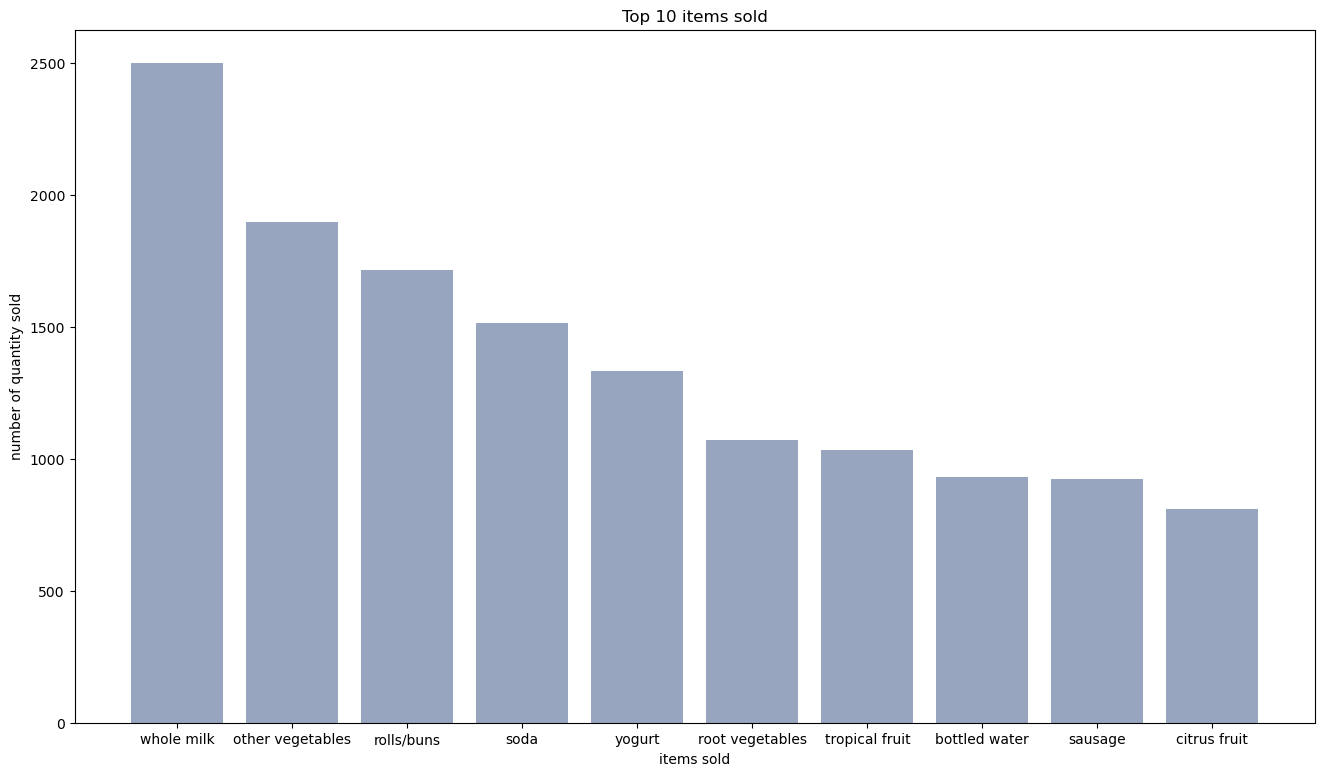

In [12]:
Item_distr= df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(10)
bars = Item_distr['itemDescription']
height =Item_distr['Frequency']
x_pos=np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 items sold")
plt.xlabel("items sold")
plt.ylabel("number of quantity sold")

plt.xticks(x_pos,bars)
plt.show()

In [13]:
df_date=df.set_index(['Date'])
df_date


,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-05-01
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-01-02
...,...,...,...
08-10-2014,4471,sliced cheese,2014-08-10
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


In [14]:
 df['Date'] = pd.to_datetime(df['Date'])
    


C:\Users\New User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\New User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\New User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\New User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide form

In [15]:
df_date = df.set_index('Date')

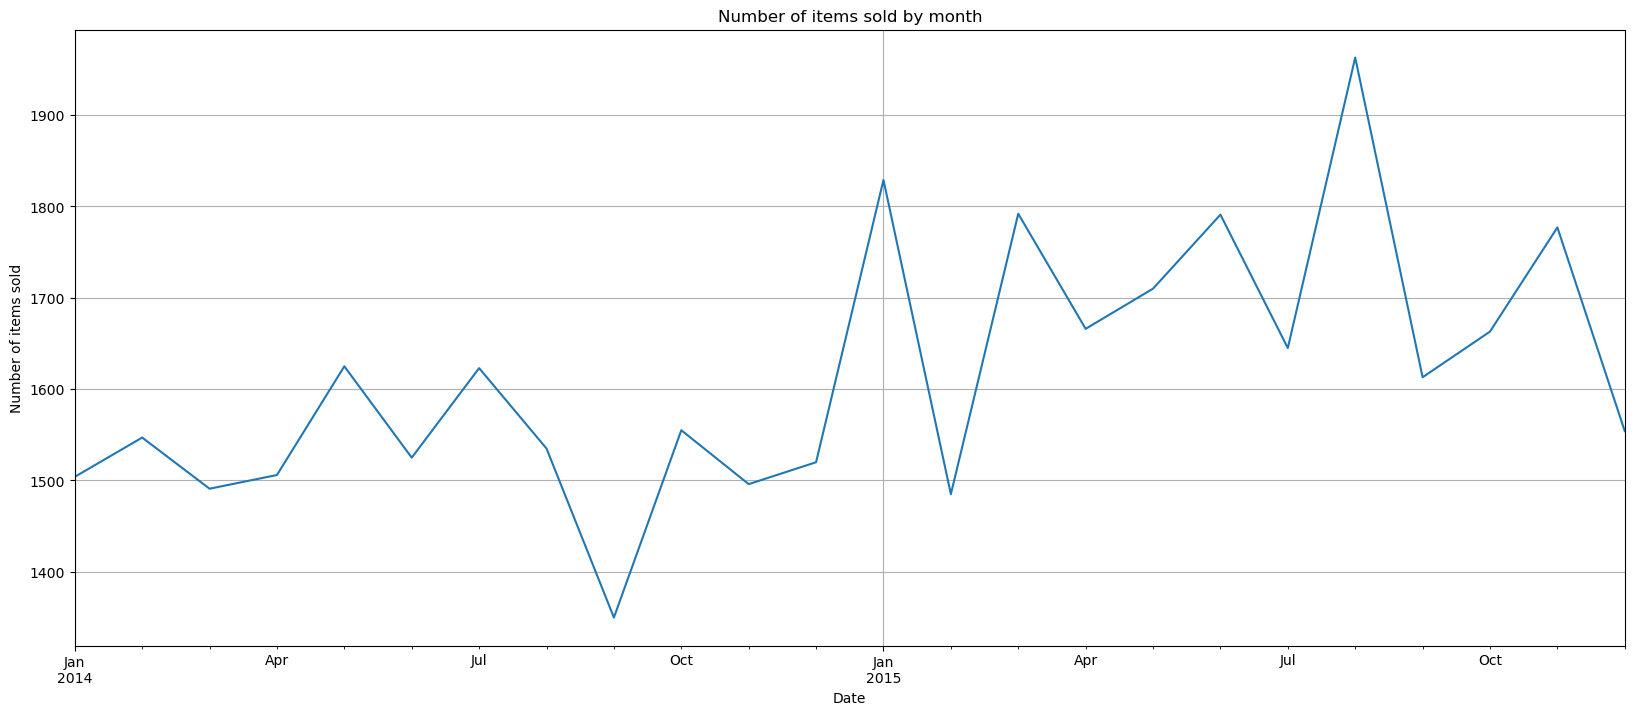

In [16]:
# Resample by month and plot
df_date.resample('M')['itemDescription'].count().plot(figsize=(20, 8), grid=True, title='Number of items sold by month')
plt.xlabel('Date')
plt.ylabel('Number of items sold')
plt.show()

In [25]:
# Create a 'uniqueTransaction' column based on customer and date
df['uniqueTransaction'] = df['Member_number'].astype(str) + '_' + df['Date'].dt.strftime('%Y-%m-%d')

# Display the modified DataFrame
df.head()


,Member_number,Date,itemDescription,date,uniqueTransaction
0,1808,2015-07-21,tropical fruit,2015-07-21,1808_2015-07-21
1,2552,2015-05-01,whole milk,2015-05-01,2552_2015-05-01
2,2300,2015-09-19,pip fruit,2015-09-19,2300_2015-09-19
3,1187,2015-12-12,other vegetables,2015-12-12,1187_2015-12-12
4,3037,2015-01-02,whole milk,2015-01-02,3037_2015-01-02


In [26]:
# Create a cross-tabulation (basket) to represent the frequency of items in each unique transaction
basket = pd.crosstab(index=df['uniqueTransaction'], columns=df['itemDescription'], values=df['itemDescription'], aggfunc='count')

# Fill missing values with 0
basket = basket.fillna(0)

# Display the basket (frequency of items in each unique transaction)
basket.head()


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1000_2015-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1000_2015-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000_2015-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000_2015-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Convert frequency values in the basket to binary (1 or 0)
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)

# Display the binary-encoded DataFrame
apriori_df


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-09-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from mlxtend.frequent_patterns import apriori

# Apply the Apriori algorithm to generate frequent itemsets
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets

C:\Users\New User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(soda, whole milk)"
122,0.005814,"(soda, yogurt)"
123,0.008220,"(tropical fruit, whole milk)"
124,0.005213,"(tropical fruit, yogurt)"


In [39]:
 rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False).head(10) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
8,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
35,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
30,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
31,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


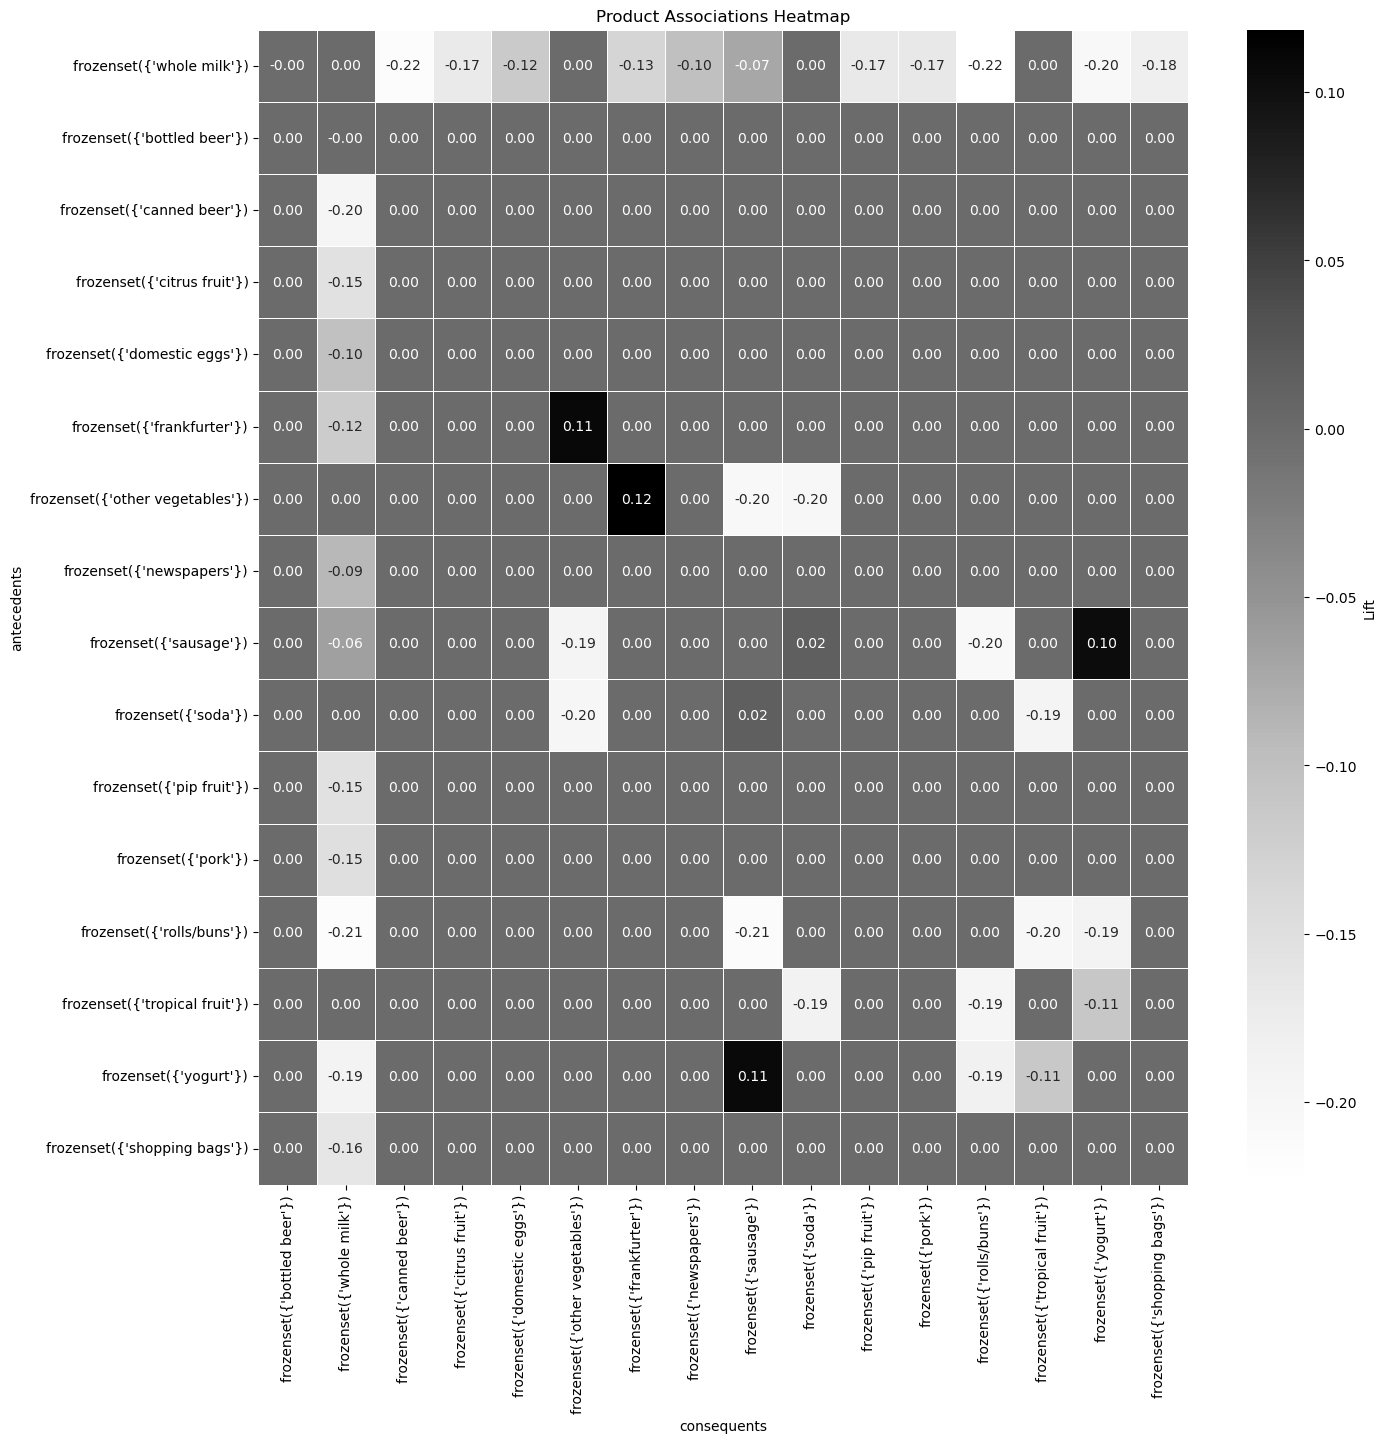

In [47]:
# Create a pivot table for the association rules
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="Greys", cbar_kws={'label': 'Lift'},linewidths=.5)
plt.title('Product Associations Heatmap')
plt.show()

 